## Init

In [1]:
import warnings
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import minmax_scale
from tqdm import tqdm

In [2]:
sns.set_theme(font_scale=1.5)
%load_ext lab_black

In [3]:
# Global variables
rows = 5
cols = 5
tiles_locations = np.arange(rows * cols)
tiles_locations.reshape((rows, cols))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [4]:
# day = "d1"
# day = "d23"
# mouse = "F03"

In [5]:
# data_folder = Path(f"{mouse}")

In [6]:
# file_day = data_folder / f"F03_{day}.csv"
# entries_and_time_spent = data_folder / f"F03_{day}entries_and_time_spent.csv"
# file_day, entries_and_time_spent

In [7]:
# day_data = pd.read_csv(file_day, index_col=0)
# day_data

In [8]:
# eats = pd.read_csv(entries_and_time_spent, index_col=0)
# eats

## Naive locations

In [9]:
naive_coord_path = Path(
    "C01_d0p0_2022-01-12_15.58DLC_resnet50_OM02Sep7shuffle1_450000.csv"
)

In [10]:
naive_data = pd.read_csv(naive_coord_path, header=[0, 1, 2])
naive_data

scorer DLC_resnet50_OM02Sep7shuffle1_450000                         \
      bodyparts                                 nose                          
         coords                                    x           y likelihood   
0             0                           484.580719  441.277863   0.805735   
1             1                           484.478455  441.300476   0.760688   
2             2                           484.451782  441.306763   0.764562   
3             3                           484.283020  441.138824   0.816283   
4             4                           484.193207  440.897675   0.795735   
...         ...                                  ...         ...        ...   
33998     33998                            25.031328  456.620422   0.030156   
33999     33999                            25.029696  456.600189   0.032066   
34000     34000                           488.672150  436.315308   0.020536   
34001     34001                           488.669464  436.315552   0.020518   
34002     34002                           488.665039  436.311737   0.020677   

                                                                           \
             head                              back                         
                x           y likelihood          x          y likelihood   
0      486.227142  438.270111   0.208251  33.814114  43.329815   0.896684   
1      486.116516  438.312012   0.146531  33.636993  43.354668   0.895018   
2      486.074005  438.252075   0.150712  33.605797  43.373108   0.887678   
3      485.987000  438.115662   0.214980  33.829613  43.437180   0.882047   
4      485.973785  437.923309   0.241380  33.913956  43.352264   0.876795   
...           ...         ...        ...        ...        ...        ...   
33998  625.805420  470.020538   0.021488  29.583996  39.233513   0.660043   
33999  625.806641  470.018219   0.021464  29.585114  39.232826   0.660048   
34000    9.948976   44.280769   0.021391  28.451088  39.230194   0.596135   
34001    9.879381   44.248905   0.020323  28.399229  39.060051   0.611167   
34002    9.953687   44.343330   0.020934  28.446491  39.242146   0.592885   

                                                                          
       Leftfront                       Rightfront                         
               x          y likelihood          x           y likelihood  
0      14.632269  56.995644   0.934244  45.712410  460.354797   0.064825  
1      14.567093  56.966537   0.931424  45.557861  460.324829   0.061583  
2      14.577804  56.919922   0.927134  45.478699  460.280151   0.061511  
3      14.697578  56.798275   0.922899  45.733154  460.049744   0.114087  
4      14.811338  56.897587   0.923874  45.849297  459.935089   0.132589  
...          ...        ...        ...        ...         ...        ...  
33998  15.282701  56.754051   0.727848  48.394463  461.192871   0.014298  
33999  15.284863  56.751068   0.727585  48.379147  461.178406   0.015368  
34000  15.036014  57.098049   0.623044  25.441177   44.171356   0.004524  
34001  14.899719  57.032249   0.623061  25.387550   44.207829   0.004219  
34002  14.987829  57.064381   0.607636  25.428171   44.222992   0.004383  

[34003 rows x 16 columns]

In [11]:
head_naive = naive_data.DLC_resnet50_OM02Sep7shuffle1_450000["head"]
head_naive

,x,y,likelihood
0,486.227142,438.270111,0.208251
1,486.116516,438.312012,0.146531
2,486.074005,438.252075,0.150712
3,485.987000,438.115662,0.214980
4,485.973785,437.923309,0.241380
...,...,...,...
33998,625.805420,470.020538,0.021488
33999,625.806641,470.018219,0.021464
34000,9.948976,44.280769,0.021391
34001,9.879381,44.248905,0.020323


In [12]:
nose_naive = naive_data.DLC_resnet50_OM02Sep7shuffle1_450000.nose
nose_naive

,x,y,likelihood
0,484.580719,441.277863,0.805735
1,484.478455,441.300476,0.760688
2,484.451782,441.306763,0.764562
3,484.283020,441.138824,0.816283
4,484.193207,440.897675,0.795735
...,...,...,...
33998,25.031328,456.620422,0.030156
33999,25.029696,456.600189,0.032066
34000,488.672150,436.315308,0.020536
34001,488.669464,436.315552,0.020518


In [13]:
def plot_coords(head, nose, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=head, x="x", y="y", ax=ax, alpha=0.25)
    sns.scatterplot(data=nose, x="x", y="y", ax=ax, alpha=0.25)
    ax.set_title(title, pad=20)
    plt.legend(["head", "nose"])
    plt.show()

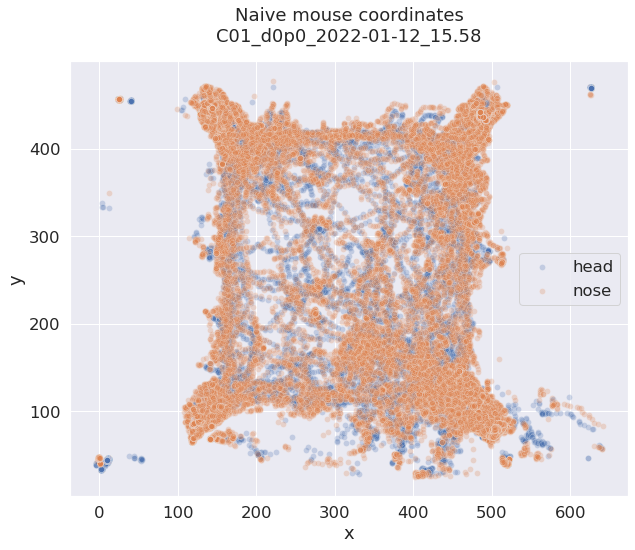

In [14]:
plot_coords(
    head=head_naive,
    nose=nose_naive,
    title="Naive mouse coordinates\n" "C01_d0p0_2022-01-12_15.58",
)

In [15]:
head_naive[head_naive.likelihood < 0.5]

,x,y,likelihood
0,486.227142,438.270111,0.208251
1,486.116516,438.312012,0.146531
2,486.074005,438.252075,0.150712
3,485.987000,438.115662,0.214980
4,485.973785,437.923309,0.241380
...,...,...,...
33998,625.805420,470.020538,0.021488
33999,625.806641,470.018219,0.021464
34000,9.948976,44.280769,0.021391
34001,9.879381,44.248905,0.020323


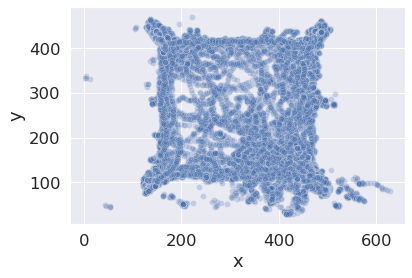

In [16]:
sns.scatterplot(data=head_naive[head_naive.likelihood > 0.75], x="x", y="y", alpha=0.25)
plt.show()

In [17]:
head_naive.query("x < 100 | x > 550")

,x,y,likelihood
30208,10.529207,43.686760,0.045018
30209,10.849377,43.784611,0.107067
30210,11.303607,43.049751,0.214048
30211,11.814631,43.549507,0.147990
30212,11.293937,43.124153,0.093877
...,...,...,...
33998,625.805420,470.020538,0.021488
33999,625.806641,470.018219,0.021464
34000,9.948976,44.280769,0.021391
34001,9.879381,44.248905,0.020323


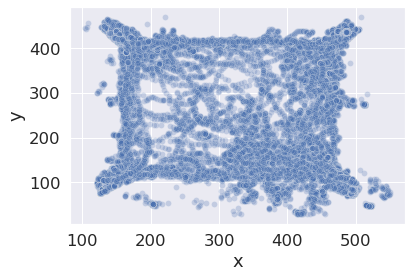

In [18]:
sns.scatterplot(data=head_naive.query("x > 100 & x < 550"), x="x", y="y", alpha=0.25)
plt.show()

In [19]:
head_naive.drop(head_naive[head_naive.likelihood < 0.5].index, inplace=True)
head_naive.drop(head_naive.query("x < 100 | x > 550").index, inplace=True)

In [20]:
head_naive

,x,y,likelihood
9,264.363373,263.832916,0.999994
10,265.427368,264.080963,0.999998
11,264.408325,267.245819,0.999999
12,262.868927,269.784302,1.000000
13,262.120758,273.435364,1.000000
...,...,...,...
33599,453.002991,54.612469,0.994040
33600,422.146759,95.260216,0.997878
33601,445.141663,34.959774,0.997825
33602,419.988953,84.961639,0.924890


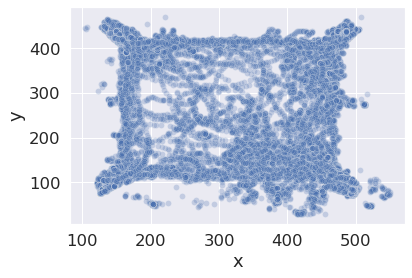

In [21]:
sns.scatterplot(data=head_naive, x="x", y="y", alpha=0.25)
plt.show()

In [22]:
head_naive

,x,y,likelihood
9,264.363373,263.832916,0.999994
10,265.427368,264.080963,0.999998
11,264.408325,267.245819,0.999999
12,262.868927,269.784302,1.000000
13,262.120758,273.435364,1.000000
...,...,...,...
33599,453.002991,54.612469,0.994040
33600,422.146759,95.260216,0.997878
33601,445.141663,34.959774,0.997825
33602,419.988953,84.961639,0.924890


In [23]:
def plot_locations_count(data, title, scale=False, cols=5, rows=5):
    # Preprocess
    hist2d, xedges, yedges = np.histogram2d(x=data.x, y=data.y, bins=[cols, rows])
    hist2d_res = hist2d.T
    if scale:
        locations_scaled = minmax_scale(hist2d.T.flatten())
        locations_scaled = locations_scaled.reshape((cols, rows))
        hist2d_res = locations_scaled

    cmap = sns.color_palette("rocket_r", as_cmap=True)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(hist2d_res, cmap=cmap, ax=ax)
    ax.set_title(title, pad=20)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    return hist2d_res

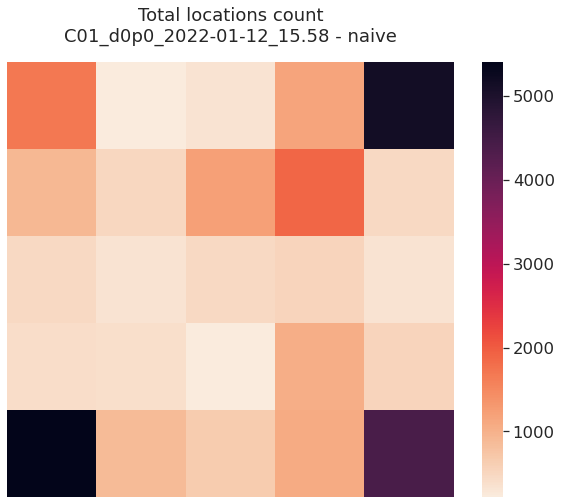

array([[1692.,  221.,  328., 1171., 5152.],
       [ 917.,  485., 1220., 1890.,  466.],
       [ 477.,  324.,  482.,  533.,  324.],
       [ 414.,  384.,  223., 1048.,  525.],
       [5406.,  872.,  656., 1090., 4398.]])

In [24]:
plot_locations_count(
    data=head_naive,
    title="Total locations count\n" "C01_d0p0_2022-01-12_15.58 - naive",
    scale=False,
    cols=cols,
    rows=rows,
)

In [25]:
# locations_scaled = minmax_scale(hist2d_naive.T.flatten())
# locations_scaled = locations_scaled.reshape((cols, rows))
# locations_scaled

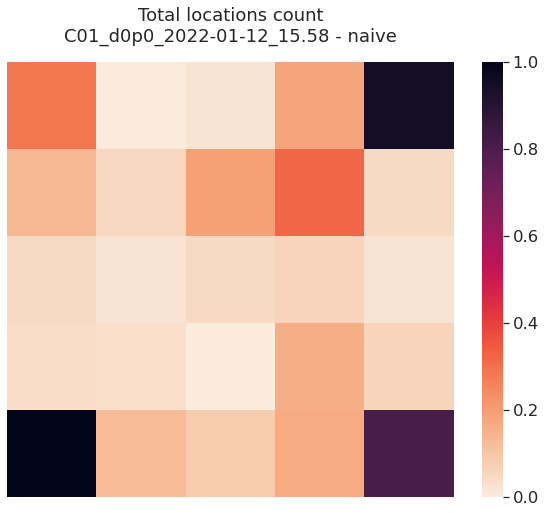

array([[2.83702989e-01, 0.00000000e+00, 2.06364513e-02, 1.83220829e-01,
        9.51012536e-01],
       [1.34233365e-01, 5.09161041e-02, 1.92671167e-01, 3.21890068e-01,
        4.72516876e-02],
       [4.93731919e-02, 1.98649952e-02, 5.03375121e-02, 6.01735776e-02,
        1.98649952e-02],
       [3.72227580e-02, 3.14368370e-02, 3.85728062e-04, 1.59498554e-01,
        5.86306654e-02],
       [1.00000000e+00, 1.25554484e-01, 8.38958534e-02, 1.67598843e-01,
        8.05593057e-01]])

In [26]:
plot_locations_count(
    data=head_naive,
    title="Total locations count\n" "C01_d0p0_2022-01-12_15.58 - naive",
    scale=True,
    cols=cols,
    rows=rows,
)

## Trained locations

In [27]:
trained_coord_path = Path("E02d49.csv")

In [28]:
trained_data = pd.read_csv(trained_coord_path)
trained_data

,bodypart/coord,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,back_x,back_y,back_likelihood,Leftfront_x,Leftfront_y,Leftfront_likelihood,Rightfront_x,Rightfront_y,Rightfront_likelihood
0,0,349.022430,108.095406,0.999988,360.572754,104.487297,0.999970,385.163605,107.169487,0.999998,367.138855,114.957848,0.999996,383.565918,73.344383,0.943940
1,1,338.064331,108.881454,0.999995,351.017395,106.490753,0.999928,372.944183,104.724731,0.999993,359.079590,117.238464,0.999997,375.409149,81.587364,0.978377
2,2,328.653625,107.669418,0.999997,341.406281,104.323296,0.999987,132.327759,443.269531,0.999994,349.027496,118.289894,0.999995,344.231232,70.524582,0.983646
3,3,319.986206,106.553856,0.999985,333.833862,75.715240,0.999895,132.199661,443.127563,0.999991,340.118683,116.522621,0.999996,338.309509,68.785263,0.999749
4,4,310.265717,108.773445,0.999999,321.223480,103.122154,0.999932,132.190628,443.115021,0.999991,332.630005,114.087669,0.999987,624.653442,319.571320,0.875527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67542,67542,60.350731,104.263115,0.760038,490.632751,68.306992,0.990186,131.095718,441.755554,0.999994,477.837250,72.272156,0.988632,495.769012,81.065552,0.999655
67543,67543,60.334740,104.276955,0.767874,490.610260,68.320480,0.990383,131.097000,441.759155,0.999994,477.837708,72.275124,0.988865,495.765045,81.057655,0.999655
67544,67544,60.331825,104.279884,0.768095,490.610962,68.320633,0.990306,131.099686,441.752625,0.999994,477.839691,72.280777,0.988750,495.769318,81.047913,0.999650
67545,67545,60.324200,104.282143,0.768779,490.616730,68.315002,0.990372,131.097687,441.756348,0.999994,477.834076,72.272095,0.988909,495.770050,81.053703,0.999656


In [29]:
nose_trained = trained_data.filter(regex=("nose.*"))
nose_trained = nose_trained.rename(
    lambda name: name.replace("nose_", ""), axis="columns"
)
nose_trained

,x,y,likelihood
0,349.022430,108.095406,0.999988
1,338.064331,108.881454,0.999995
2,328.653625,107.669418,0.999997
3,319.986206,106.553856,0.999985
4,310.265717,108.773445,0.999999
...,...,...,...
67542,60.350731,104.263115,0.760038
67543,60.334740,104.276955,0.767874
67544,60.331825,104.279884,0.768095
67545,60.324200,104.282143,0.768779


In [30]:
head_trained = trained_data.filter(regex=("head.*"))
head_trained = head_trained.rename(
    lambda name: name.replace("head_", ""), axis="columns"
)
head_trained

,x,y,likelihood
0,360.572754,104.487297,0.999970
1,351.017395,106.490753,0.999928
2,341.406281,104.323296,0.999987
3,333.833862,75.715240,0.999895
4,321.223480,103.122154,0.999932
...,...,...,...
67542,490.632751,68.306992,0.990186
67543,490.610260,68.320480,0.990383
67544,490.610962,68.320633,0.990306
67545,490.616730,68.315002,0.990372


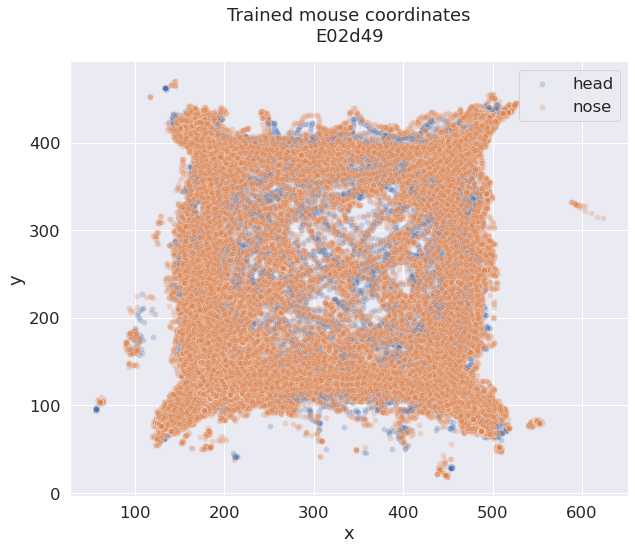

In [31]:
plot_coords(
    head=head_trained,
    nose=nose_trained,
    title="Trained mouse coordinates\n" f"{trained_coord_path.stem}",
)

In [32]:
head_trained.drop(head_trained[head_trained.likelihood < 0.5].index, inplace=True)
head_trained.drop(head_trained.query("x < 80 or x > 550").index, inplace=True)
head_trained

,x,y,likelihood
0,360.572754,104.487297,0.999970
1,351.017395,106.490753,0.999928
2,341.406281,104.323296,0.999987
3,333.833862,75.715240,0.999895
4,321.223480,103.122154,0.999932
...,...,...,...
67542,490.632751,68.306992,0.990186
67543,490.610260,68.320480,0.990383
67544,490.610962,68.320633,0.990306
67545,490.616730,68.315002,0.990372


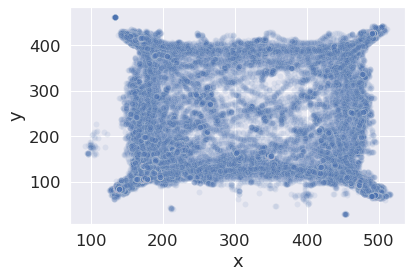

In [33]:
sns.scatterplot(data=head_trained, x="x", y="y", alpha=0.1)
plt.show()

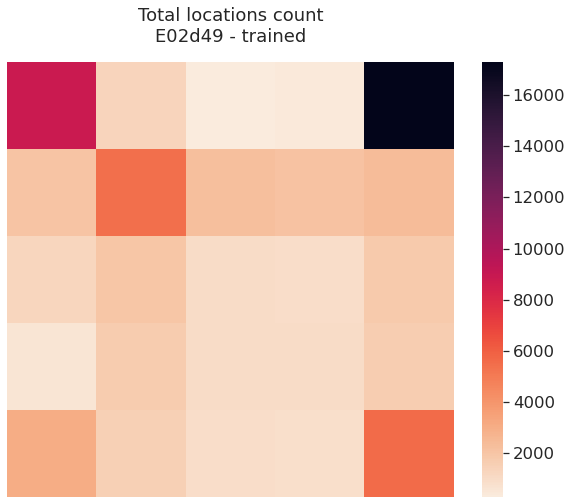

array([[ 8836.,  1341.,   293.,   402., 17295.],
       [ 2026.,  5411.,  2278.,  2121.,  2391.],
       [ 1286.,  1984.,   993.,   948.,  1818.],
       [  584.,  1728.,   980.,  1020.,  1636.],
       [ 3055.,  1525.,   956.,   884.,  5572.]])

In [34]:
plot_locations_count(
    data=head_trained,
    title="Total locations count\n" f"{trained_coord_path.stem} - trained",
    scale=False,
    cols=cols,
    rows=rows,
)

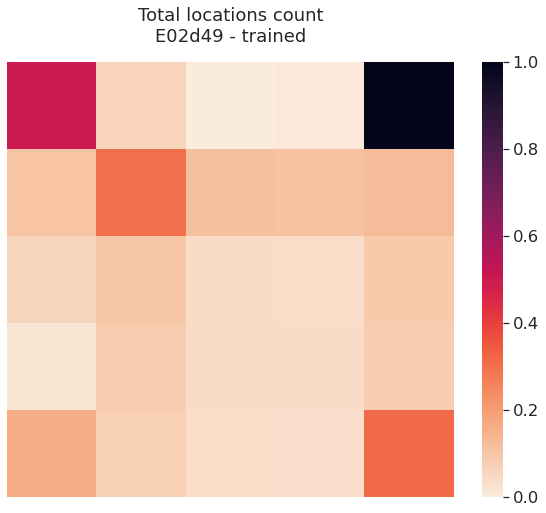

array([[0.5024703 , 0.06163981, 0.        , 0.00641101, 1.        ],
       [0.10192918, 0.30102341, 0.11675097, 0.10751676, 0.12339725],
       [0.05840489, 0.09945889, 0.04117163, 0.03852488, 0.08969533],
       [0.01711563, 0.08440184, 0.04040701, 0.04275968, 0.07899071],
       [0.16245148, 0.07246206, 0.03899541, 0.03476062, 0.31049288]])

In [35]:
plot_locations_count(
    data=head_trained,
    title="Total locations count\n" f"{trained_coord_path.stem} - trained",
    scale=True,
    cols=cols,
    rows=rows,
)

## Extract actions

In [36]:
# x_bins = np.arange(cols)
# y_bins = np.arange(rows)
# for col in range(cols):
#     x_bins[col] = (
#         head_naive.x.max() - head_naive.x.min()
#     ) / cols + col * head_naive.x.min()
# for row in range(rows):
#     y_bins[row] = (
#         head_naive.y.max() - head_naive.y.min()
#     ) / rows + row * head_naive.y.min()
# x_bins, y_bins

In [37]:
# head_naive["col"] = np.digitize(head_naive.x, x_bins)
# head_naive["row"] = np.digitize(head_naive.y, y_bins)
# head_naive

In [38]:
hist2d_naive, xedges_naive, yedges_naive = np.histogram2d(
    x=head_naive.x, y=head_naive.y, bins=[cols, rows]
)
hist2d_naive, xedges_naive, yedges_naive

(array([[1692.,  917.,  477.,  414., 5406.],
        [ 221.,  485.,  324.,  384.,  872.],
        [ 328., 1220.,  482.,  223.,  656.],
        [1171., 1890.,  533., 1048., 1090.],
        [5152.,  466.,  324.,  525., 4398.]]),
 array([104.36366272, 193.47792969, 282.59219666, 371.70646362,
        460.82073059, 549.93499756]),
 array([ 28.11961555, 116.63198395, 205.14435234, 293.65672073,
        382.16908913, 470.68145752]))

In [39]:
col = np.full(shape=len(head_naive), fill_value=np.nan)
row = np.full(shape=len(head_naive), fill_value=np.nan)
for idr, _ in enumerate(tqdm(head_naive.index)):
    for idx, xedge in enumerate(xedges_naive[1:]):
        if head_naive.iloc[idr].x <= xedge:
            col[idr] = idx
            break
    for idy, yedge in enumerate(yedges_naive[1:]):
        if head_naive.iloc[idr].y <= yedge:
            row[idr] = idy
            break
head_naive["row"] = row.astype(np.int_)
head_naive["col"] = col.astype(np.int_)
head_naive

100%|████████████████████████████████████████████████████████| 30698/30698 [00:05<00:00, 5566.85it/s]


,x,y,likelihood,row,col
9,264.363373,263.832916,0.999994,2,1
10,265.427368,264.080963,0.999998,2,1
11,264.408325,267.245819,0.999999,2,1
12,262.868927,269.784302,1.000000,2,1
13,262.120758,273.435364,1.000000,2,1
...,...,...,...,...,...
33599,453.002991,54.612469,0.994040,0,3
33600,422.146759,95.260216,0.997878,0,3
33601,445.141663,34.959774,0.997825,0,3
33602,419.988953,84.961639,0.924890,0,3


In [40]:
tiles_locations.reshape((rows, cols)).T

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [41]:
head_naive["tile"] = np.full(shape=len(head_naive), fill_value=np.nan)
for row in range(rows):
    for col in range(cols):
        head_naive.loc[
            (head_naive.row == row) & (head_naive.col == col), "tile"
        ] = tiles_locations.reshape((rows, cols)).T[row, col]
head_naive

,x,y,likelihood,row,col,tile
9,264.363373,263.832916,0.999994,2,1,7.0
10,265.427368,264.080963,0.999998,2,1,7.0
11,264.408325,267.245819,0.999999,2,1,7.0
12,262.868927,269.784302,1.000000,2,1,7.0
13,262.120758,273.435364,1.000000,2,1,7.0
...,...,...,...,...,...,...
33599,453.002991,54.612469,0.994040,0,3,15.0
33600,422.146759,95.260216,0.997878,0,3,15.0
33601,445.141663,34.959774,0.997825,0,3,15.0
33602,419.988953,84.961639,0.924890,0,3,15.0


In [42]:
tile_changes = head_naive.iloc[
    np.concatenate(
        [np.array([False]), (head_naive.tile.diff().dropna() != 0).to_numpy()]
    )
]
tile_changes

,x,y,likelihood,row,col,tile
27,267.945007,294.988892,0.999997,3,1,8.0
46,282.921906,306.088837,0.999999,3,2,13.0
53,282.469482,307.136414,0.999999,3,1,8.0
73,267.170410,285.767456,0.999999,2,1,7.0
118,285.119751,237.945511,1.000000,2,2,12.0
...,...,...,...,...,...,...
33591,398.772675,206.368393,0.776575,2,3,17.0
33592,486.371521,438.587463,0.602021,4,4,24.0
33593,442.505035,143.422333,0.990860,1,3,16.0
33596,448.316010,113.454041,0.990819,0,3,15.0


In [43]:
row_conv = {1: "UP", -1: "DOWN"}
col_conv = {1: "RIGHT", -1: "LEFT"}

head_naive["action"] = np.full(shape=len(head_naive), fill_value=np.nan)
diff_row = tile_changes.row.diff()
diff_col = tile_changes.col.diff()
for idx, row in tile_changes[1:].iterrows():
    if diff_row[idx] != 0 and np.abs(diff_row[idx]) == 1:
        head_naive.loc[idx, "action"] = row_conv[diff_row[idx]]
    elif diff_col[idx] != 0 and np.abs(diff_col[idx]) == 1:
        head_naive.loc[idx, "action"] = col_conv[diff_col[idx]]
    else:
        warnings.warn(
            f"Issue with row: {idx} - row: {diff_row[idx]} - col: {diff_col[idx]}"
        )
head_naive.dropna()

/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 30249 - row: -2.0 - col: 0.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31356 - row: 3.0 - col: 4.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31462 - row: 3.0 - col: -3.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31478 - row: -2.0 - col: 4.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31488 - row: 2.0 - col: -3.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31495 - row: 0.0 - col: 3.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31503 - row: 0.0 - col: -3.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31522 - row: -2.0 - col: 0.0
  warnings.warn(
/tmp/ipykernel_30821/2291312631.py:13: UserWarning: Issue with row: 31523 - row: 2.0 - col

,x,y,likelihood,row,col,tile,action
46,282.921906,306.088837,0.999999,3,2,13.0,RIGHT
53,282.469482,307.136414,0.999999,3,1,8.0,LEFT
73,267.170410,285.767456,0.999999,2,1,7.0,DOWN
118,285.119751,237.945511,1.000000,2,2,12.0,RIGHT
208,347.860718,202.673126,0.999996,1,2,11.0,DOWN
...,...,...,...,...,...,...,...
33591,398.772675,206.368393,0.776575,2,3,17.0,LEFT
33592,486.371521,438.587463,0.602021,4,4,24.0,RIGHT
33593,442.505035,143.422333,0.990860,1,3,16.0,LEFT
33596,448.316010,113.454041,0.990819,0,3,15.0,DOWN
